In [1]:
import cv2

In [2]:
img = cv2.imread('D:\javaForever\images\landscape.jpg')

In [3]:
#cv2.imshow('images', img)

In [4]:
cv2.imshow('images', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
gray_img = cv2.imread('D:\javaForever\images\landscape.jpg', cv2.IMREAD_GRAYSCALE)

In [16]:
cv2.imshow('Gray', gray_img)

In [7]:
cv2.imwrite('D:\javaForever\images\landscape_copy.jpg', gray_img)

True

In [8]:
print[x for x in dir(cv2) if x.startswith('color_')]

SyntaxError: invalid syntax (<ipython-input-8-7e7682fba368>, line 1)

In [9]:
img2 = cv2.imread('D:\javaForever\images\landscape.jpg')

In [10]:
gray_img=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2.imshow('GRAYscale image')

TypeError: Required argument 'mat' (pos 2) not found

In [5]:
import numpy as np

In [6]:
img = cv2.imread('D:\javaForever\images\landscape.jpg')
num_rows, num_cols = img.shape[:2]

In [5]:
translation_matrix = np.float32([[1,0,70], [0,1,110]])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols+70, num_rows+110))
translation_matrix= np.float32([[1,0,-30],[0,1,-50]])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols+70+30, num_rows+110+50))
cv2.imshow('Translation', img_translation)

In [9]:
rotation_matrix= cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2.imshow('Rotation', img_rotation)

In [12]:
translation_matrix = np.float32([[1,0,int(0.5*num_cols)], [0,1,int(0.5*num_rows)]])
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 30, 1)
img_translation = cv2.warpAffine(img_translation, rotation_matrix,(2*num_cols, 2*num_rows))
cv2.imshow('Rotation', img_rotation)

In [15]:
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
cv2.imshow('Scaling - Linear Interpolation', img_scaled)
img_scaled = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
img_scaled = cv2.resize(img, (450,400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled)

In [18]:
img = cv2.imread('D:\javaForever\images\landscape.jpg')
rows, cols = img.shape[:2]

In [9]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)), rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output=cv2.warpAffine(img, affine_matrix, (cols,rows))

In [10]:
cv2.imshow('input', img)
cv2.imshow('output', img_output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1, rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*(cols)), rows-1], [int(0.66*(cols)), rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols, rows))

In [17]:
cv2.imshow('output', img_output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
kernel_identity = np.array([[0,0,1],[0,1,0],[0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32)/9.0
kernel_5x5 = np.ones((5,5), np.float32)/25.0

In [20]:
cv2.imshow('Original', img)

In [21]:
output = cv2.filter2D(img, -1, kernel_identity)
cv2.imshow('Identity filter', output)
output = cv2.filter2D(img, -1, kernel_3x3)
cv2.imshow('3x3 filter', output)
output = cv2.filter2D(img, -1, kernel_5x5)
cv2.imshow('5x5 filter', output)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
from matplotlib import pyplot as plt

In [55]:
img = cv2.imread('D:\javaForever\images\capture.jpg')

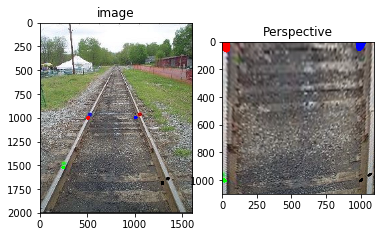

In [56]:
pts1= np.float32([[504,1003],[243,1524],[1000,1000],[1280,1685]])
pts2= np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])
cv2.circle(img, (504,1003),20,(255,0,0),-1)
cv2.circle(img, (243,1524),20,(0,255,0),-1)
cv2.circle(img, (1000,1000),20,(0,0,255),-1)
cv2.circle(img, (1280,1685),20,(0,0,0),-1)
M=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(img, M, (1100,1100))
plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

In [1]:
import numpy as np
import cv2

In [5]:
file = 'video.mp4'
cap = cv2.VideoCapture(file)

while(True):
    ret,frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [12]:
def draw_rectangle(event, x, y, flags, params):
    global x_init, y_init, drawing, top_left_pt, bottom_right_pt
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_init, y_init = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_pt = (min(x_init, x),min(y_init, y))
            bottom_right_pt = (max(x_init, x), max(y_init, y))
            img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x]
        
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_pt = (min(x_init, x), min(y_init, y))
        bottom_right_pt = (max(x_init, x), max(y_init, y))
        img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x]
if __name__ == '__main__':
    drawing = False
    top_left_pt, bottom_right_pt = (-1,-1), (-1,-1)
    file = 'video.mp4'
    cap = cv2.VideoCapture(file)
    
#    if not cap.isOpened():
#        raise IOError("cannot open video")
    cv2.namedWindow('Webcam')
    cv2.setMouseCallback('Webcam', draw_rectangle)
        
    while True:
        ret, frame = cap.read()
        img = cv2.resize(frame, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
        (x0,y0), (x1,y1) = top_left_pt, bottom_right_pt
        img[y0:y1, x0:x1] = 255 - img[y0:y1, x0:x1]
            
        cv2.imshow('Webcam', img)
          
        c= cv2.waitKey(1)
        if c == 27:
            break
                
    cap.release()
    cv2.destroyAllWindows()[60]


error: OpenCV(3.4.1) C:\bld\opencv_1520732670222\work\opencv-3.4.1\modules\imgproc\src\resize.cpp:4044: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize


In [ ]:
img = cv2.imread('wow.jpg')
ouput = cv2.medianBlur(img, 7)
cv2.imshow('Input',img)
cv2.imshow('Medi')

In [1]:
import cv2
import numpy as np

img = cv2.imread('sc.jpg')

In [9]:
px = img[100,100]
print(px)
blue = img[100,100,0]
print(blue)

[190  84  60]
190


In [11]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


In [12]:
img.item(10,10,2)

49

In [13]:
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [50]:
ball = img[175:230, 380:440]
img[273:273+ball.shape[0], 100:100+ball.shape[1]] = ball

In [52]:
cv2.imshow('images', img)

cv2.waitKey(0)
cv2.destroyAllWindows()